# CaseStudy_EDA



##Import Libraries and Dataset

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency, ttest_ind

# Mount Drive and Load Dataset
drive.mount('/content/drive')
train_data = '/content/drive/MyDrive/AIAD_Casestudy/train.csv'
df = pd.read_csv(train_data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Visualisation

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Data Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


General overview of the dataset, take into consideration that there are null values in "age", "cabin" and "embarked"

In [26]:
# Missing Values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_data_df)

             Missing Values  Percentage
Age                     177   19.865320
Cabin                   687   77.104377
Embarked                  2    0.224467
Fare                      0    0.000000
Name                      0    0.000000
Parch                     0    0.000000
PassengerId               0    0.000000
Pclass                    0    0.000000
Sex                       0    0.000000
SibSp                     0    0.000000
Survived                  0    0.000000
Ticket                    0    0.000000


This confirms null values within the dataset

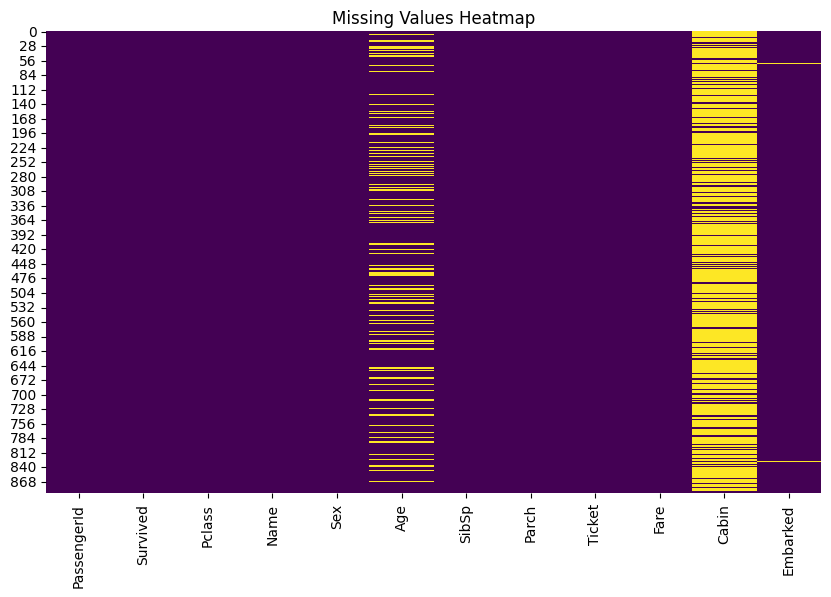

In [27]:
# Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Visualising Null Values

In [28]:
# Fill Missing Values
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-28-9666381a2d49>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


To fill up missing values in "age", i decided to use the median of pclass and sex,
for "embarked" i used the most common port.

In [29]:
# Missing Values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_data_df)

             Missing Values  Percentage
Age                       0    0.000000
Cabin                   687   77.104377
Embarked                  0    0.000000
Fare                      0    0.000000
Name                      0    0.000000
Parch                     0    0.000000
PassengerId               0    0.000000
Pclass                    0    0.000000
Sex                       0    0.000000
SibSp                     0    0.000000
Survived                  0    0.000000
Ticket                    0    0.000000


this shows that there are no more nulls except for cabin, i decided to use cabin as a feature

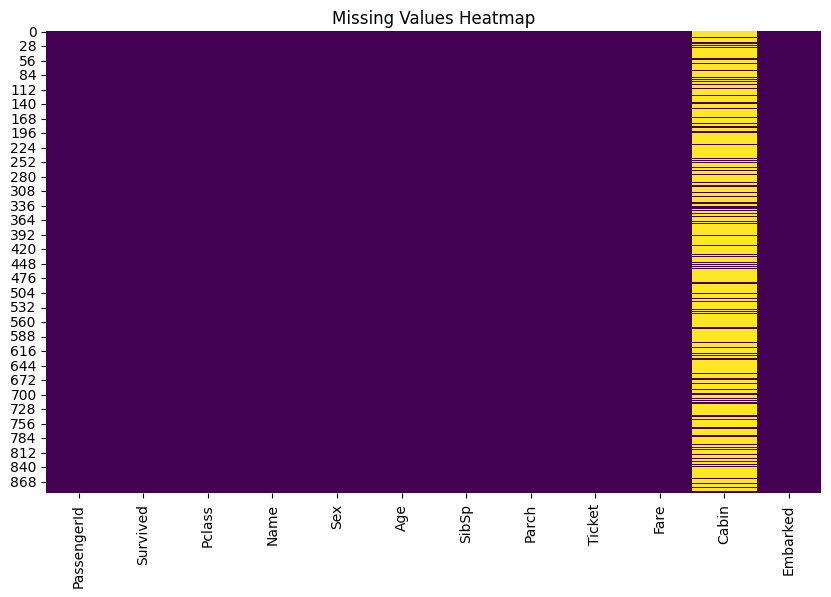

In [30]:
# Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

##Feature Visualisation

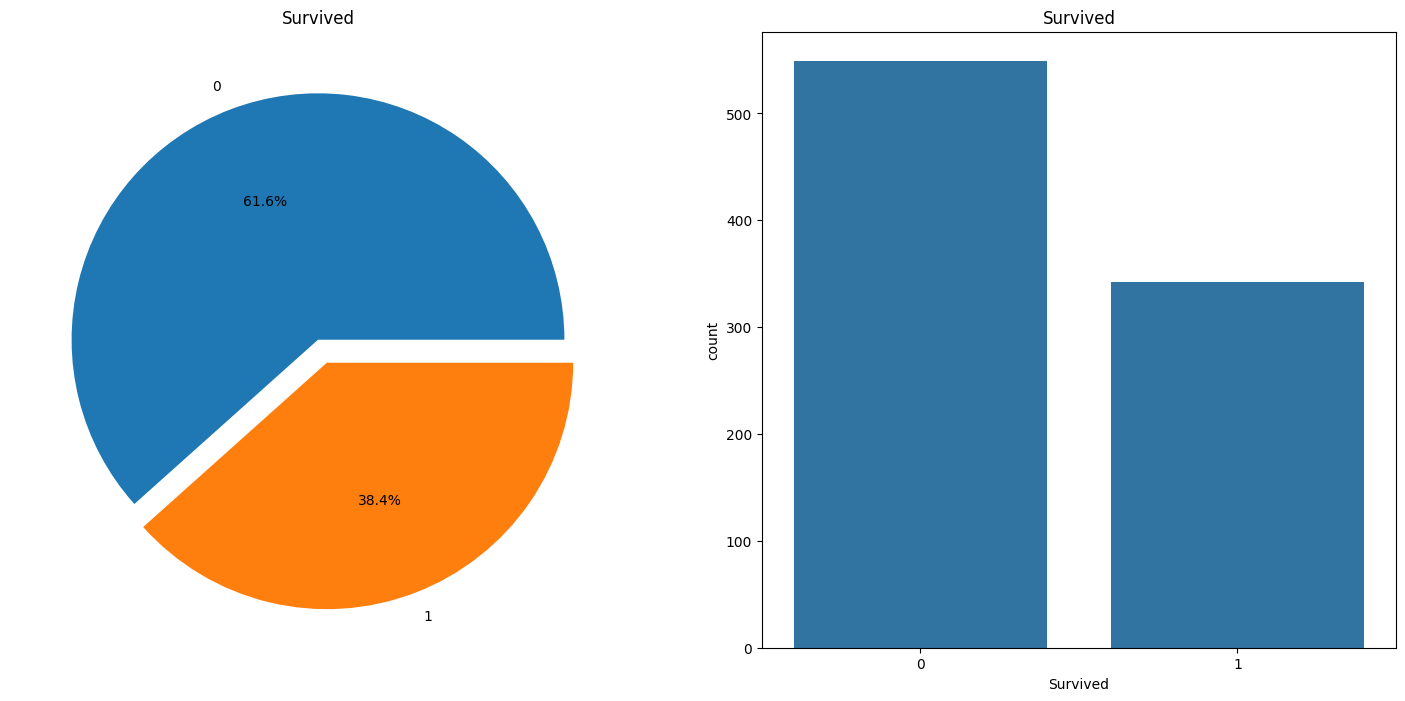

In [31]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

As seen, more than 60% of poeple that were on the Titanic perished, not so unsinkable.

##Feature Engineering

In [33]:
# New Features
df['HasCabin'] = df['Cabin'].notna().astype(int)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).map({
        "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
        "Dr": "Other", "Rev": "Other", "Col": "Other", "Mlle": "Miss",
        "Major": "Other", "Mme": "Mrs", "Capt": "Other", "Countess": "Other",
        "Jonkheer": "Other", "Don": "Other"
        })
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

# Age Bins
df['Age_band'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  HasCabin  FamilySize  \
0      0         A/5 21171   7.2500   NaN        S         0           2   
1      0          PC 17599  71.2833   C85        C         1           2   
2      0  STON/O2. 3101282   7.9250   NaN        S         0           1   
3      0        

Here, i made it so that if the passenger had a cabin it could be represented by a 1 whilst if they did not it would be 0

I also combined SibSp and Parch to make Family Size

I referenced a dictionary showing the titles of people and decided to categorize them for simplicity

i also introduced a single rider feature

i also introduced a fare bin, this is to reduce the complexity of the data

age band is also a way of reducing data complexity, we can observe more categorial insights from this

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,Title,IsAlone,FareBin,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Mrs,0,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,Mrs,0,4,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr,1,2,2


##Feature Analysis

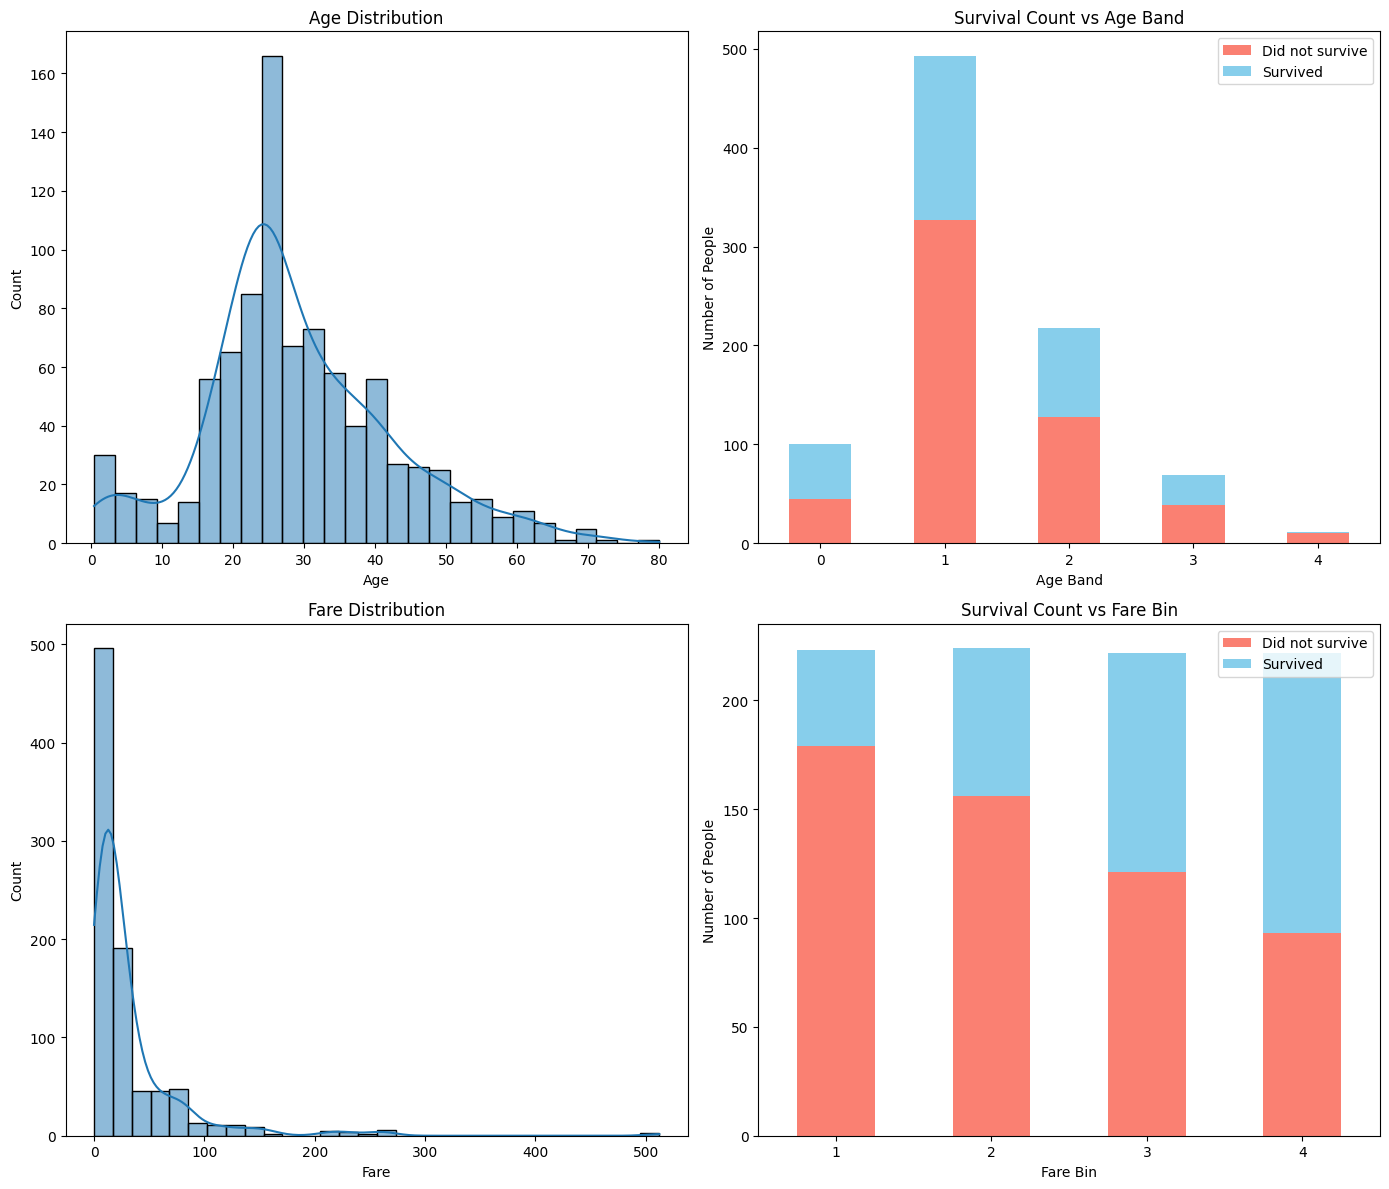

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

fare_survival_count_age.plot(kind='bar', stacked=True, ax=axes[0, 1], color=['salmon', 'skyblue'])
axes[0, 1].set_title('Survival Count vs Age Band')
axes[0, 1].set_xlabel('Age Band')
axes[0, 1].set_ylabel('Number of People')
axes[0, 1].set_xticklabels(fare_survival_count_age.index.astype(str), rotation=0)
axes[0, 1].legend(['Did not survive', 'Survived'])

sns.histplot(df['Fare'], kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Fare Distribution")

fare_survival_count_fare.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['salmon', 'skyblue'])
axes[1, 1].set_title('Survival Count vs Fare Bin')
axes[1, 1].set_xlabel('Fare Bin')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].set_xticklabels(fare_survival_count_fare.index.astype(str), rotation=0)
axes[1, 1].legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()


From here, we can see the general distribution for age and fare according to their hard numbers and also the categorical numbers

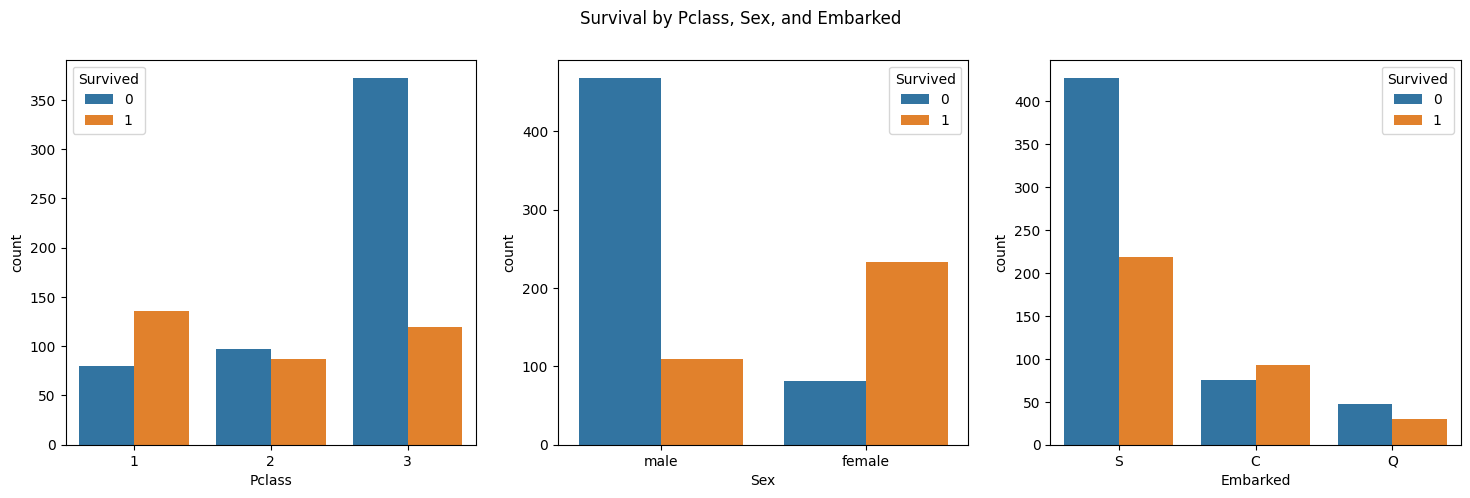

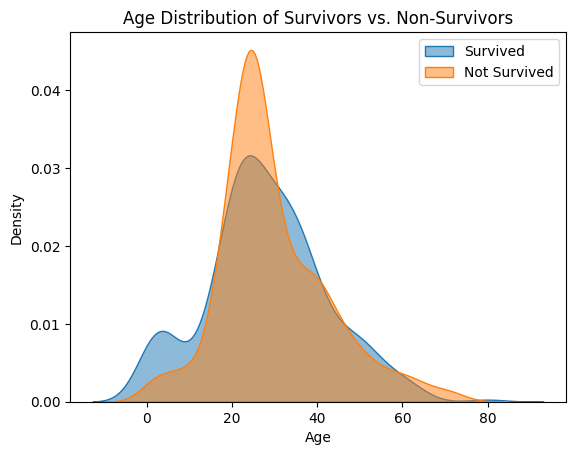

In [36]:
# Survival by Categorical Features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0])
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1])
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[2])
fig.suptitle('Survival by Pclass, Sex, and Embarked')
plt.show()

# KDE Plot: Age Distribution
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label='Survived', alpha=0.5)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label='Not Survived', alpha=0.5)
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.legend()
plt.show()


general feature distribution as compared to survival

In [37]:
# The impact of passenger class and gender on the survival outcome
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

We can observe from this that the likelyness of surving as a female is significantly higher in Pclass 1 and 2, however in 3 the chance is 50/50

Whilst for males, the chance of survival is generally low across all the classes, we can observe a higher percentage of survival in Pclass 1 and 2 as compared to 3.

In [38]:
# Analysis of the embarkation point feature
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins=True).style.background_gradient(cmap='summer_r')

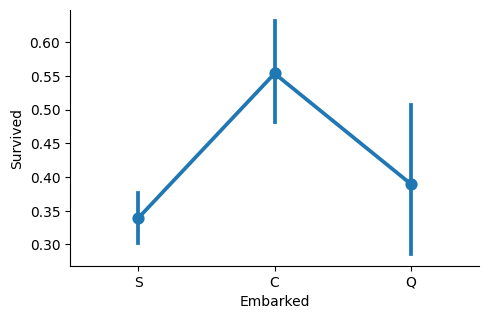

In [39]:
# Use factorplot to visualize the relationship between the embarkation point and survival
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

Evidently, the chances of survival is higher if you had embarked at C, however, this can be explained by the number of first class passengers embarking at C as compared to the other ports

Text(0.5, 0.98, 'Survival by Pclass, Sex, and Embarked')

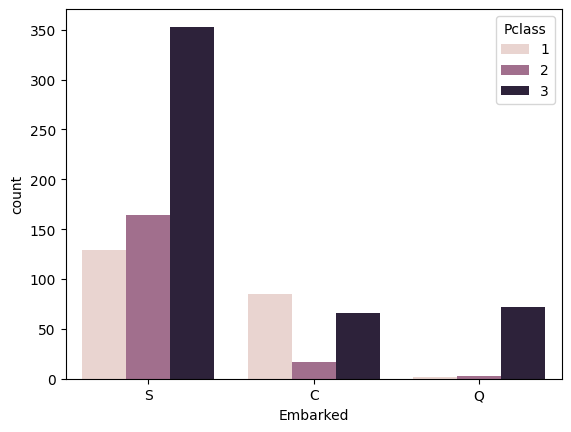

In [40]:
sns.countplot(x='Embarked', hue='Pclass', data=df)
fig.suptitle('Survival by Pclass, Sex, and Embarked')

As explained, the survival rate is directly correlated to class.

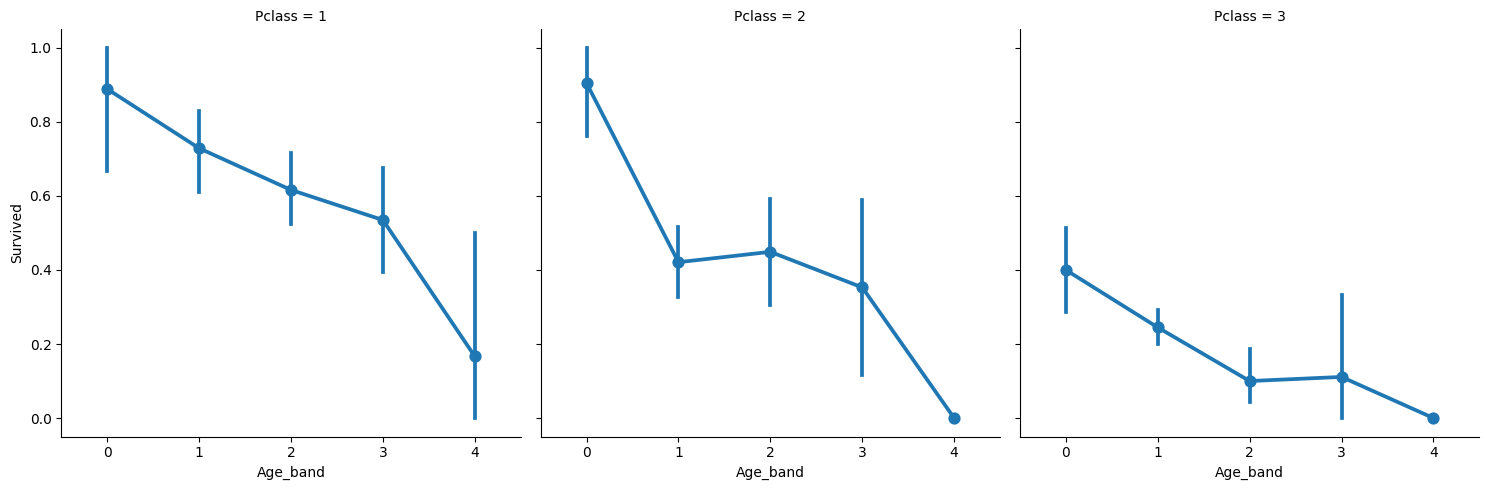

In [41]:
# Visualize the relationship between age bands and survival, separated by passenger class
sns.catplot(x='Age_band', y='Survived', data=df, kind='point', col='Pclass')
plt.show()

We can see an overall decreasing trend in survivability with age, this can be explained by the "women and children first" procedure they had when allocating seats in liferafts

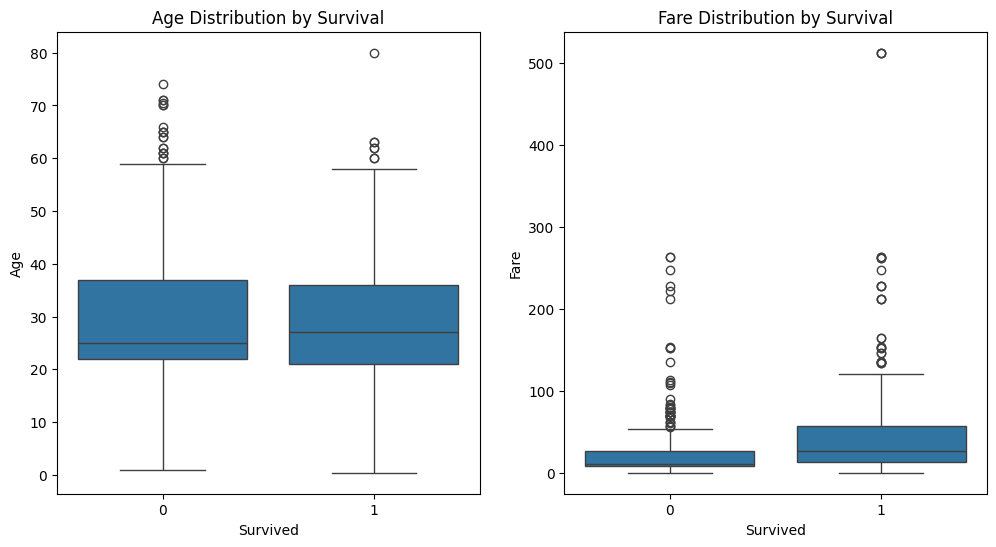

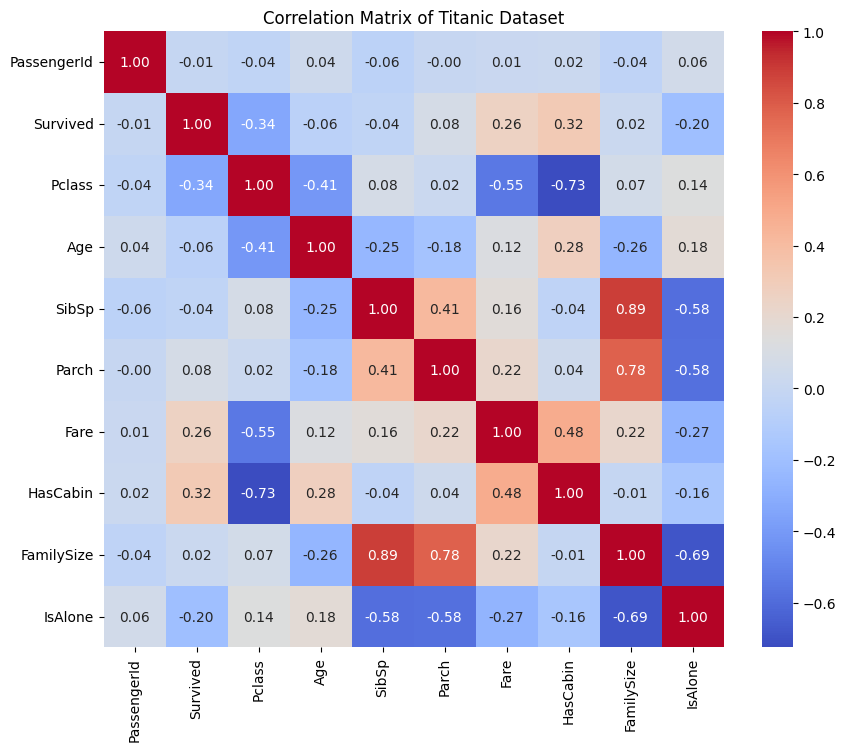

In [42]:
# Fare and Age by Survival
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[0].set_title("Age Distribution by Survival")
axes[1].set_title("Fare Distribution by Survival")
plt.show()

# Heatmap for Correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()


##Hypothesis Testing

In [43]:
# Chi-Square Test
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Pclass and Survived: p-value = {p}")


Chi-Square Test for Pclass and Survived: p-value = 4.549251711298793e-23
T-Test for Age and Survived: p-value = 0.07548530586360941


To test my first hypothesis that Pclass and survived is correlated, i decicded to employ the chi square test, the result of the test indicated high correlation between survivability and class

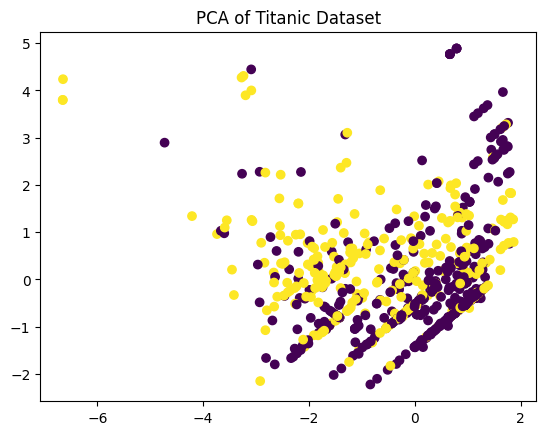

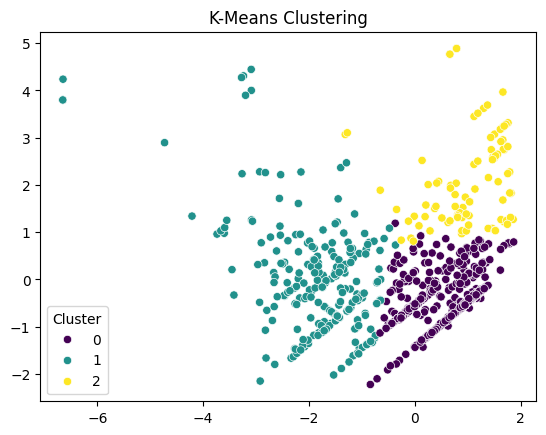

In [44]:
features = ['Age', 'Fare', 'Pclass', 'FamilySize']
X = df[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Survived'], cmap='viridis')
plt.title("PCA of Titanic Dataset")
plt.show()

# K-Means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering")
plt.show()


##Model Introduction

In [45]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin']]
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
y = df['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Support Vector Machine': SVC(probability=True, random_state=0),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=0)
}

# Train and Evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


=== Logistic Regression ===
Accuracy: 0.8060
Confusion Matrix:
[[144  24]
 [ 28  72]]

=== Decision Tree ===
Accuracy: 0.8134
Confusion Matrix:
[[146  22]
 [ 28  72]]

=== Random Forest ===
Accuracy: 0.8358
Confusion Matrix:
[[151  17]
 [ 27  73]]

=== Gradient Boosting ===
Accuracy: 0.8209
Confusion Matrix:
[[150  18]
 [ 30  70]]

=== Support Vector Machine ===
Accuracy: 0.7164
Confusion Matrix:
[[160   8]
 [ 68  32]]

=== Neural Network ===
Accuracy: 0.7910
Confusion Matrix:
[[142  26]
 [ 30  70]]

